# Generating Landmarks

## Local Landmark of Neuron
* Step1: Obtain the tiles that are either single neurons and/or stitched partial ones that are eligible to generate neurons
* Step2: Obtain the central location of a given tile, based on thresholding and centre of mass of image which is the landmark needed : (x,y)   

## Global Landmark of Neuron
* Step3: In order to obtain global landmarks, get the respective tilenumber and also global coordinates of the tile. 
* Step4: The local coordinates need to be subtracted from the (x2,y2) of the global coordinates: landmark_x = x2 - cx, landmark_y = y2 - cy

## Generate landmarks and landmark files
* Step5: Add all the landmarks into a separate  text file

## Step2

## Importing and displaying the particular tile

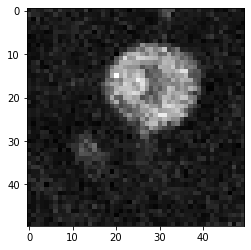

In [50]:
import cv2 as cv
import numpy as np
source_path = '/Users/keshavaprasad/Desktop/image/Classification_model/singleneurontiles/1.tif'
img = cv.imread(source_path,0)
#print(img.shape)

import matplotlib.pyplot as plt
plt.imshow(img,cmap='gray')
plt.show()

In [28]:
# Blurring for removing the noise
#img_blur = cv.bilateralFilter(img, d = 7,sigmaSpace = 75, sigmaColor =75)
#plt.imshow(img_blur,cmap='gray')
#plt.show()

## Binary Thresholding 

255


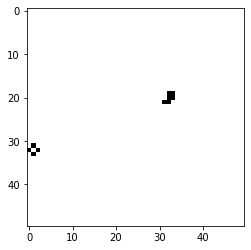

In [31]:
# Apply the thresholding
a = img.max()
print(a)
_, thresh = cv.threshold(img_blur, a/2, a,cv.THRESH_BINARY_INV)
plt.imshow(thresh, cmap = 'gray')

## Otsu thresholding

In [32]:
# only thresholding + otsu + find contours
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY+cv.THRESH_OTSU) 
#ret1 is the thresholding value and th1 is the thresholded image


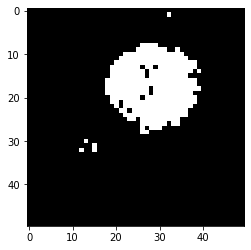

In [33]:
plt.imshow(th1,cmap='gray')
plt.show()

## finding contours in order to find centroid

In [52]:
contours,hierarchy = cv.findContours(th1, 1, 2)
cnt = contours[0]
#len(contours)
#contours[2]

## Method1 : via minimum enclosing circle around the contour and then finding the centre of the circle

In [53]:
(cx,cy),radius = cv.minEnclosingCircle(cnt)
center = (int(cx),int(cy))
radius = int(radius/10)
#cv.circle(img,center,1, (0, 0, 255), 3)
cv.circle(img,center,1, (255, 0,0,), 1)
center
## but this is not correct!

(12, 32)

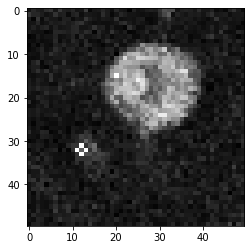

In [54]:
plt.imshow(img,cmap='gray')


## Method 2: Via image moments through pixel intensities

In [42]:
# this might not work since image has thresholded and there is no variation in pixel intensities
M = cv.moments(cnt)
print(M)


{'m00': 0.0, 'm10': 0.0, 'm01': 0.0, 'm20': 0.0, 'm11': 0.0, 'm02': 0.0, 'm30': 0.0, 'm21': 0.0, 'm12': 0.0, 'm03': 0.0, 'mu20': 0.0, 'mu11': 0.0, 'mu02': 0.0, 'mu30': 0.0, 'mu21': 0.0, 'mu12': 0.0, 'mu03': 0.0, 'nu20': 0.0, 'nu11': 0.0, 'nu02': 0.0, 'nu30': 0.0, 'nu21': 0.0, 'nu12': 0.0, 'nu03': 0.0}


In [43]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
print("cx:",cx,",cy:",cy) # cx and cy is the local coordinate of the tile
cv.circle(img,center,1, (0, 255,0), 1)


ZeroDivisionError: float division by zero

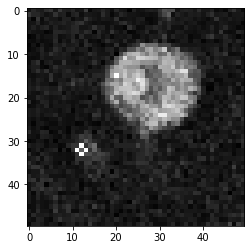

In [38]:
plt.imshow(img,cmap='gray')
plt.show()

## Calculating Landmarks

In [ ]:
# calculating landmarks
#Need to get value of x2, y2 here which is the global coordinates of the tile! these are the global coordinates!
#landmark_x = x2 - cx # is the global landmark of the particular neuron
#landmark_y = y2 - cy

landmarks = [] 
landmarks.extend(list(zip(landmark_x,landmark_y)))# containing a tuple of landmarks

import csv

with open('landmarks.csv','wb') as out:
    csv_out=csv.writer(out)
    csv_out.writerow([landmark_x,landmark_y])
    for row in data:
        csv_out.writerow(row)

    

In [ ]:
#ret,thresh = cv2.threshold(img,127,255,0)
#contours,hierarchy = cv2.findContours(thresh, 1, 2)
#cnt = contours[0]

#print(len(contours))
#print(ret)
#print(thresh)
#print(contours[0])
#print(hierarchy)
#M = cv2.moments(cnt)
#print( M)
#cx = int(M['m10']/M['m00'])
#cy = int(M['m01']/M['m00'])
#print("cx:",cx,",cy:",cy) # cx and cy is the local coordinate of the tile



#(cx,cy),radius = cv2.minEnclosingCircle(cnt)
#center = (int(cx),int(cy))
#radius = int(radius/10)
#cv2.circle(img,center,radius,(0,255, 0), -1)
#print(cx,cy)

#cv2.circle(img, (cx, cy), 1, (0, 0, 255), -1)
